In [6]:
%reload_ext autoreload
%autoreload

import numpy as np
import creature_spawning.spawn_creature as sc
import visualization.plant_rendering as pr
import visualization.array_rendering as ar
import simulation.gas_drift as gd
import simulation.plant_simulation as ps

world_params = { 'world_size': 200,
             'global_creature_id_counter': int(1) }
world_params['world_array'] = np.zeros(shape=(world_params['world_size'], world_params['world_size']), dtype=int)
world_params['carbon_dioxide_map'] = np.full(shape=(world_params['world_size'], world_params['world_size']),
                         fill_value=0)
sc.spawn_new_plants(world_params=world_params,
                         num_plants=100)
pr.place_plants(world_params)

def run_sim_for_x_steps(steps):

    for i in range(steps):
        world_params['world_array'] = np.zeros(shape=(world_params['world_size'], world_params['world_size']), dtype=int)

        pr.place_plants(world_params)
        ps.photosynthesize(world_params)

        world_params['carbon_dioxide_map'][int(world_params['world_size'] * .25)][int(world_params['world_size'] * .25)] += 1
        world_params['carbon_dioxide_map'][int(world_params['world_size'] * .25)][int(world_params['world_size'] * .75)] += 1
        world_params['carbon_dioxide_map'][int(world_params['world_size'] * .75)][int(world_params['world_size'] * .25)] += 1
        world_params['carbon_dioxide_map'][int(world_params['world_size'] * .75)][int(world_params['world_size'] * .75)] += 1

        gd.move_gases(world_params['carbon_dioxide_map'], world_params['world_size'])
        ps.grow_plants(world_params)

        world_params['world_array'] = np.zeros(shape=(world_params['world_size'], world_params['world_size']), dtype=int)
        pr.place_plants(world_params)

# run_sim_for_x_steps()

In [7]:
%reload_ext line_profiler

%lprun -f run_sim_for_x_steps run_sim_for_x_steps(1000)

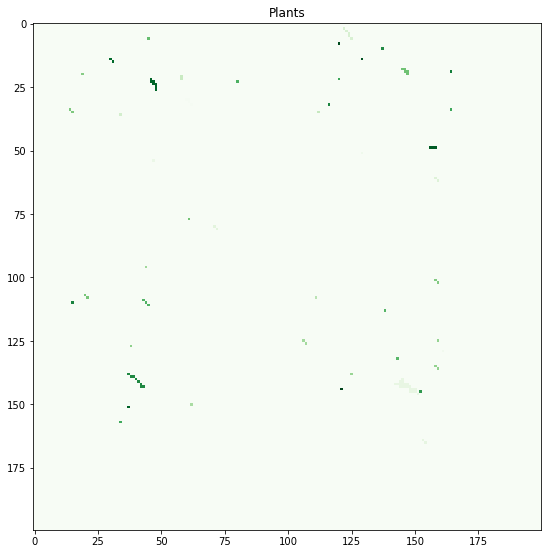

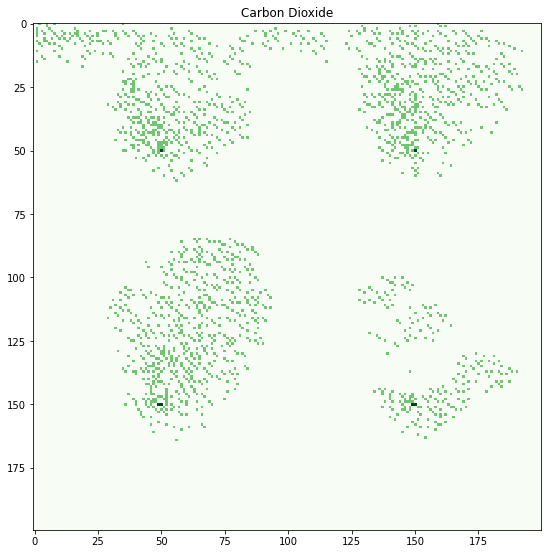

{'world_size': 200,
 'global_creature_id_counter': 101,
 'world_array': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]]),
 'carbon_dioxide_map': array([[0, 0, 1, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 1, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]]),
 'plants': [{'c_id': 1,
   'x_translation': 32,
   'y_translation': 62,
   'energy': 4349,
   'segments': array([[ 1,  0,  0, -1, -1],
          [ 1, -1, -1, -2, -2],
          [ 1, -2, -2, -3, -2],
          [ 1, -1, -1, -2, -1],
          [ 1, -2, -1, -3, -1],
          [ 1, -1, -1, -1, -1]])},
  {'c_id': 2,
   'x_translation': 82,
   'y_translation': 152,
   'energy': 0,
   'segments': array([[ 0,  0,  0,  0, -1]])},
  {'c_id': 3,
   'x_translation': 73,
   'y_translation':

In [8]:
ar.render_array(world_params['world_array'], 'Plants')
ar.render_array(world_params['carbon_dioxide_map'], 'Carbon Dioxide')

world_params